 Otsu(code by me)    Otsu(OpenCV)
------------------  --------------
        57                56
       137               136
       145               144
       169               168
       142               141
       113               112


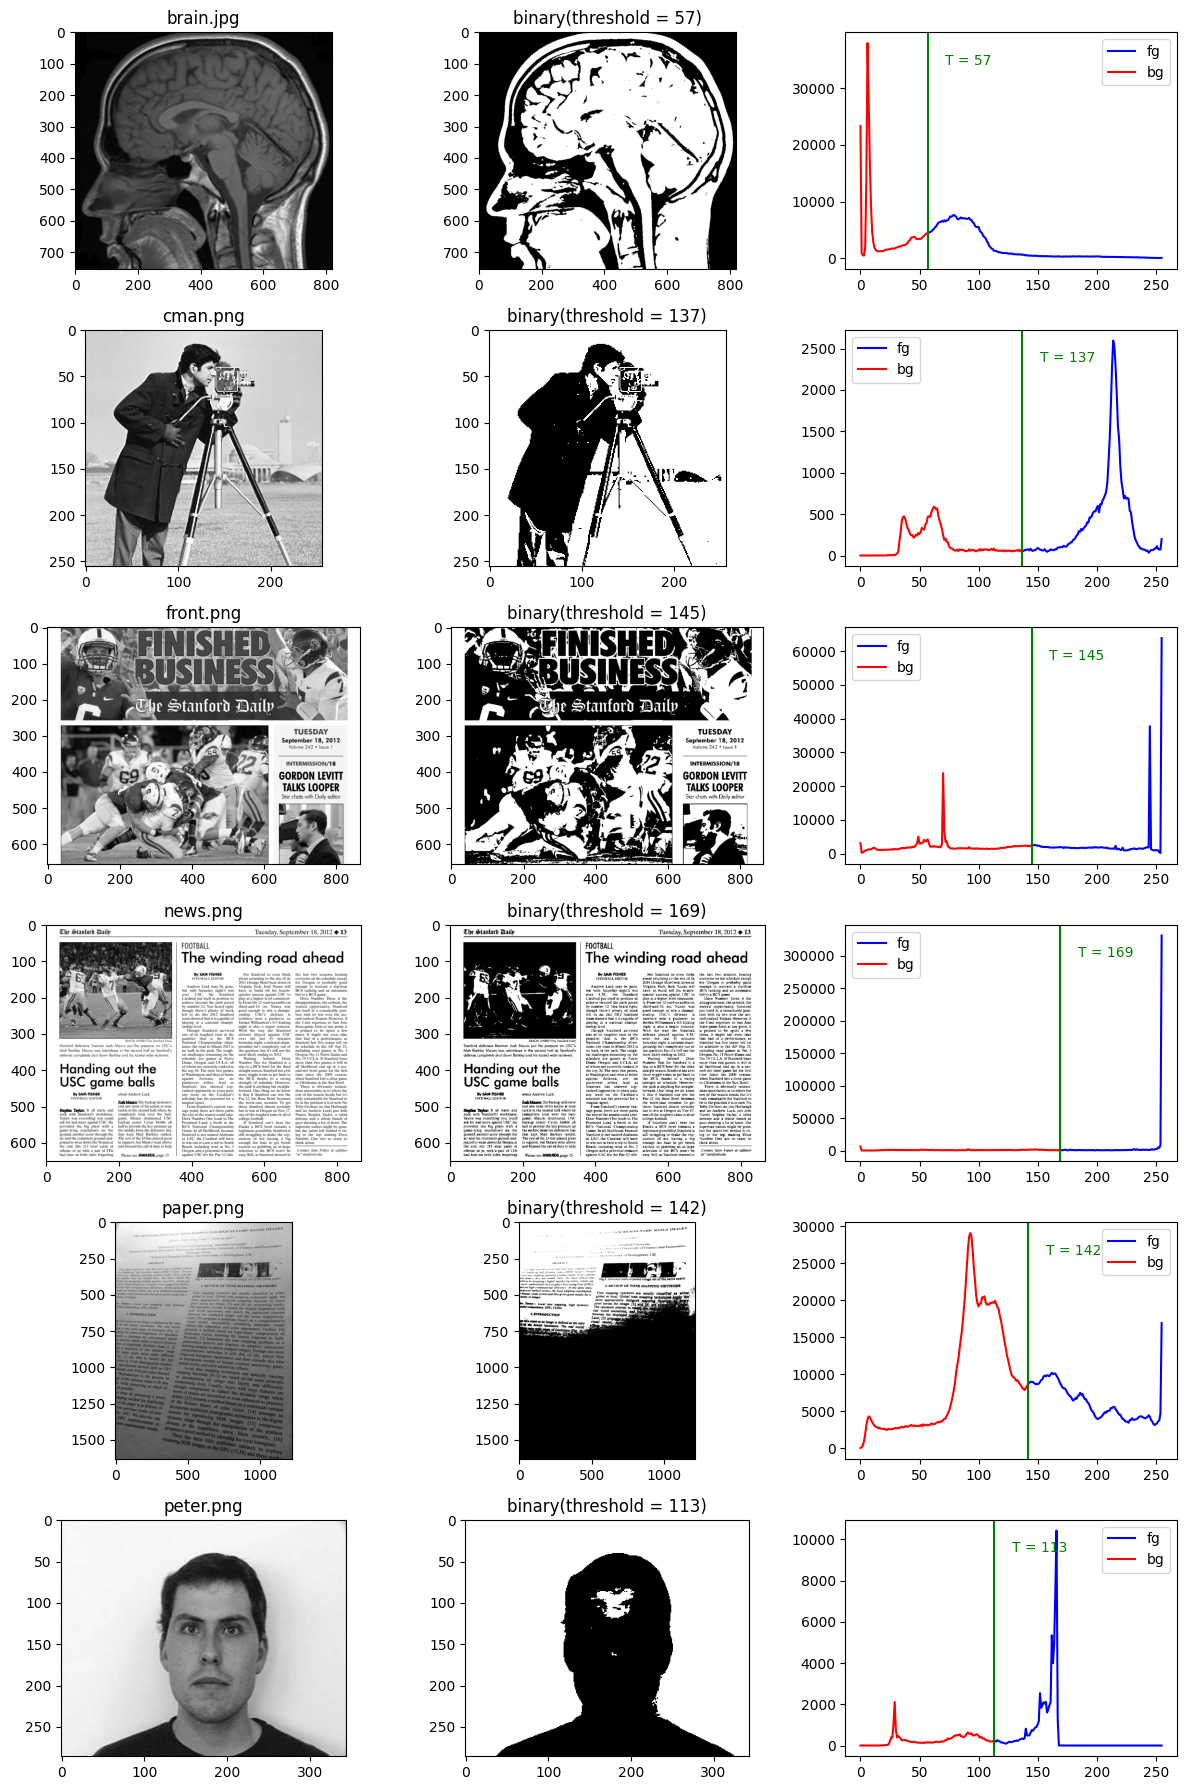

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

def otsu_within_class_variance_thresholding(img)->int:
    h, w = img.shape[0], img.shape[1]
    n = h*w
    color_count = np.array([int(np.sum(img == _)) for _ in range(256)], np.uint32)

    best_within_variance = float('inf')
    best_t = None
    for t in range(0, 256):
        # number of pixel in fg, bg
        # fg: pixel val >= t
        n_fg = np.sum(color_count[t:]).astype(np.uint32)
        n_bg = np.sum(color_count[0:t]).astype(np.uint32)

        if (n_fg == 0) or (n_bg==0):
            continue

        mean_fg = np.sum(np.arange(t,256) * color_count[t:]).astype(np.float32) / n_fg
        mean_bg = np.sum(np.arange(0, t) * color_count[0:t]).astype(np.float32) / n_bg

        variance_fg = np.sum( ((np.arange(t, 256)-mean_fg)**2) * color_count[t:] ).astype(np.float32) / n_fg
        variance_bg = np.sum( ((np.arange(0, t)-mean_bg)**2) * color_count[0:t] ).astype(np.float32) / n_bg


        this_within_variance = variance_fg*(n_fg/n) + variance_bg*(n_bg/n)

        if this_within_variance < best_within_variance:
            best_within_variance = this_within_variance
            best_t = t

    return best_t

# plot

img_paths = ["brain.jpg", "cman.png", "front.png", "news.png", "paper.png", "peter.png"]
imgs = [ cv2.imread(_, cv2.IMREAD_GRAYSCALE) for _ in img_paths]

thresholds = [
    (
        otsu_within_class_variance_thresholding(_),
        cv2.threshold(_, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]
    )
    for _ in imgs
    ]

headers = ["Otsu(code by me)", "Otsu(OpenCV)"]
print(tabulate(thresholds, headers=headers, colalign=("center","center")))

plot_cols = 3
plot_rows = len(imgs)
plt.figure("Otsu Comparison", figsize=(12, 3*plot_rows))
colors = [_ for _ in range(0, 256)]
color_count = []
for i in range(len(imgs)):
    color_count = np.array([int(np.sum(imgs[i] == _)) for _ in range(256)], np.uint32)
    t = thresholds[i][0]

    fg_x = colors[t:]
    bg_x = colors[:t]

    fg_y = color_count[t:]
    bg_y = color_count[:t]

    plt.subplot(plot_rows, plot_cols, i*plot_cols + 1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f"{img_paths[i]}")

    plt.subplot(plot_rows, plot_cols, i*plot_cols + 2)
    plt.imshow(imgs[i] > t, cmap='gray')
    plt.title(f"binary(threshold = {t})")


    plt.subplot(plot_rows, plot_cols, i*plot_cols + 3)
    plt.plot(fg_x, fg_y, color='blue', label="fg")
    plt.plot(bg_x, bg_y, color='red', label="bg")
    plt.axvline(x=t, color='green')
    plt.text(t + 15, max(color_count)*0.9, f"T = {t}", color="green")

    plt.legend()


plt.tight_layout()